# Benford law and fraud analysis


In [27]:
# packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

In [2]:
# dataset
data = pd.read_csv("/home/andressa/Desktop/Pastas/Blogs/archive/creditcard.csv")

### Descriptive Analysis

In [3]:
# shape of the dataset
data.shape

(284807, 31)

In [4]:
# columns names
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# head of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
# summary
data.iloc[:,0:data.shape[1]-1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [10]:
# study Class variable
np.unique(data.Class)

array([0, 1])

In [20]:
data.groupby("Class").count().iloc[:,0]

Class
0    284315
1       492
Name: Time, dtype: int64

In [25]:
print("Normal: ", round((data.groupby("Class").count().iloc[0,0]/data.shape[0])*100,2))
print("Fraud: ", round((data.groupby("Class").count().iloc[1,0]/data.shape[0])*100,2))

Normal:  99.83
Fraud:  0.17


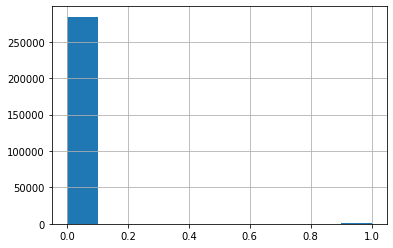

In [13]:
# plot
data["Class"].hist()

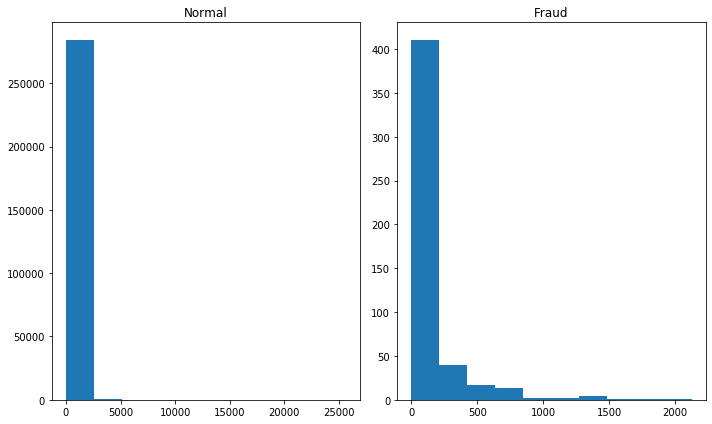

In [28]:
# split normal (Class = 0)  and fraud (Class = 1)

normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

a = plt.figure(num=None, figsize=(10, 6))

a1 = a.add_subplot(121)
a1.hist(normal.Amount)
a1.title.set_text('Normal')

a2 = a.add_subplot(122)
a2.hist(fraud.Amount)
a2.title.set_text('Fraud')

plt.tight_layout()
plt.show()

### Complex analysis

In [43]:
# filtering values greater than 0
aux = data.Amount[data.Amount > 0]
aux

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 282982, dtype: float64

In [44]:
# taking the first digit
aux = aux.apply(lambda elem: elem // 10**(len(str(math.floor(elem))) - 1))
aux

0         1.0
1         2.0
2         3.0
3         1.0
4         6.0
         ... 
284802    0.0
284803    2.0
284804    6.0
284805    1.0
284806    2.0
Name: Amount, Length: 282982, dtype: float64

In [ ]:
# calculate the frequency
qt_numbers = aux.value_counts()
qt_numbers

In [45]:
percent = qt_numbers.apply(lambda elem: (elem/aux.count())*100)
percent

1.0    30.661668
2.0    14.968090
3.0     9.869886
4.0     8.206176
5.0     6.549887
9.0     5.269593
6.0     4.975935
7.0     4.866387
8.0     4.502053
Name: Amount, dtype: float64

In [72]:
# transforming exponential value
result = pd.Series()
for i in range(1,10):
     result.at[i] = round(math.log(1 + 1/i,10) * 100,2)
result

/home/andressa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


1    30.10
2    17.61
3    12.49
4     9.69
5     7.92
6     6.69
7     5.80
8     5.12
9     4.58
dtype: float64

Expected frequencies :
 1    30.10
2    17.61
3    12.49
4     9.69
5     7.92
6     6.69
7     5.80
8     5.12
9     4.58
dtype: float64 

Real frequencies:
 1.0    30.661668
2.0    14.968090
3.0     9.869886
4.0     8.206176
5.0     6.549887
6.0     4.975935
7.0     4.866387
8.0     4.502053
9.0     5.269593
Name: Amount, dtype: float64


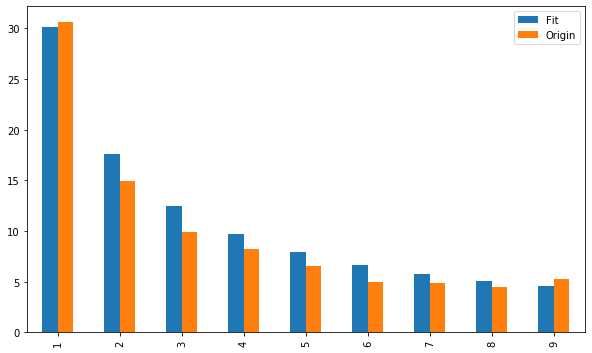

In [73]:
# plot

data2 = pd.DataFrame(columns=['Fit', 'Origin'])
data2['Fit'] = result
data2['Origin'] = percent
        
print('Expected frequencies :\n', result.sort_index(), '\n')
print('Real frequencies:\n',percent.sort_index())

data2.plot.bar(figsize = (10,6))

In [74]:
# deep analysis

aux2 = fraud.Amount

aux2 = aux2[aux2 > 0].apply(lambda elem: elem // 10**(len(str(math.floor(elem))) - 1)).value_counts()
aux2

1.0    202
3.0     49
0.0     41
9.0     41
2.0     39
4.0     23
7.0     23
5.0     18
8.0     16
6.0     13
Name: Amount, dtype: int64

In [77]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64